In [1]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from collections import OrderedDict
import seaborn as sns
from scipy.interpolate import interp1d
from IPython.display import display, Markdown

pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.cm.get_cmap('RdYlBu')

In [2]:
# pickleFileCut = './DMsimp_spin-1_Monojet_DF.pcl'
pickleFileCut = './DMsimp_spin-0_Monojet_DF.pcl'
dfAll = pd.read_pickle(pickleFileCut)

In [3]:
# df = dfAll[(dfAll['Coupling'] == 'Axial') 
#                  & (dfAll['Mode'] == 'DM+QCDjets') 
#                  & (dfAll['Data-takingperiod'] == 2017)]

df = dfAll[(dfAll['Coupling'] == 'Scalar') 
                 & (dfAll['Mode'] == 'DM+QCDjets') 
                 & (dfAll['Data-takingperiod'] == 2017)]

# df = dfAll[(dfAll['Coupling'] == 'Pseudoscalar') 
#                  & (dfAll['Mode'] == 'DM+QCDjets') 
#                  & (dfAll['Data-takingperiod'] == 2017)]

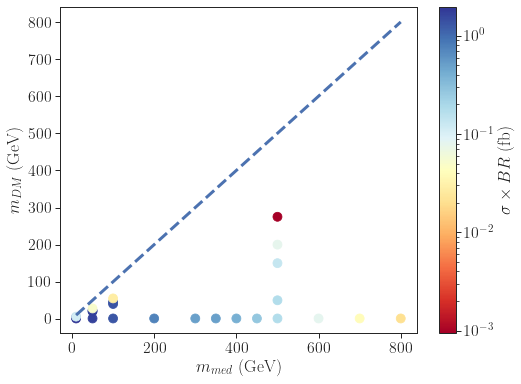

In [4]:
plt.figure(figsize=(8,6))
p =plt.scatter(df['$m_{med}$'], df['$m_{DM}$'], c=df['Total xsec-pT150 (pb)'],
               s=80,cmap=cm,
               norm=LogNorm(vmin=df['Total xsec-pT150 (pb)'].min(),vmax=df['Total xsec-pT150 (pb)'].max()))
x = np.linspace(df['$m_{med}$'].min(),df['$m_{med}$'].max(),100)
plt.plot(x,x,linestyle='--',linewidth=3)
plt.colorbar(label=r'$\sigma \times BR$ (fb)')
plt.xlabel(r'$m_{med}$ (GeV)')
plt.ylabel(r'$m_{DM}$ (GeV)')
plt.show()

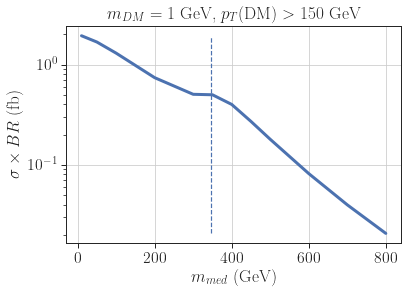

In [5]:
# Plot cross-sections for mDM = 1.0 only
df0 = df[df['$m_{DM}$'] == 1.0]
plt.plot(df0['$m_{med}$'], df0['Total xsec-pT150 (pb)'],linewidth=3)
mtop = 173.0
plt.vlines(x=2*mtop,ymin=df0['Total xsec-pT150 (pb)'].min(),ymax=df0['Total xsec-pT150 (pb)'].max(),
          linestyles='--')
plt.xlabel(r'$m_{med}$ (GeV)')
plt.ylabel(r'$\sigma \times BR$ (fb)')
plt.yscale('log')
plt.title(r'$m_{DM} = 1$ GeV, $p_T$(DM) $> 150$ GeV')
plt.grid()
plt.show()

In [6]:
df0['Total xsec-pT150 (pb)'].min()

0.020591860431606834

In [7]:
df0[['$m_{med}$','Total xsec-pT150 (pb)']]

,$m_{med}$,Total xsec-pT150 (pb)
154,10.0,1.940543
168,50.0,1.679024
150,100.0,1.300155
157,200.0,0.739554
158,300.0,0.504576
159,350.0,0.499218
160,400.0,0.399685
161,450.0,0.270342
163,500.0,0.179210
172,600.0,0.081467
